In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Laden der Daten
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/27/2014,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,5/28/2014,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,5/29/2014,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,5/30/2014,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,6/2/2014,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1510 non-null   object 
 1   Open Price       1510 non-null   float64
 2   High Price       1510 non-null   float64
 3   Low Price        1510 non-null   float64
 4   Close Price      1510 non-null   float64
 5   Adj Close Price  1510 non-null   float64
 6   Volume           1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


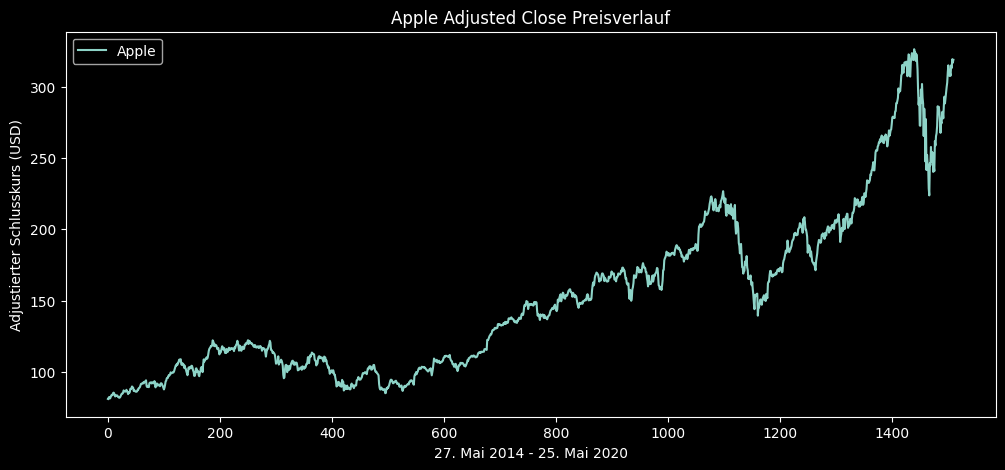

In [8]:
# Plotten des Kursverlaufs des Adjusted Close Preises
plt.figure(figsize=(12, 5))
plt.plot(apple['Adj Close Price'], label='Apple')
plt.title('Apple Adjusted Close Preisverlauf')
plt.xlabel("27. Mai 2014 - 25. Mai 2020")
plt.ylabel("Adjustierter Schlusskurs (USD)")
plt.legend(loc="upper left")
plt.show()

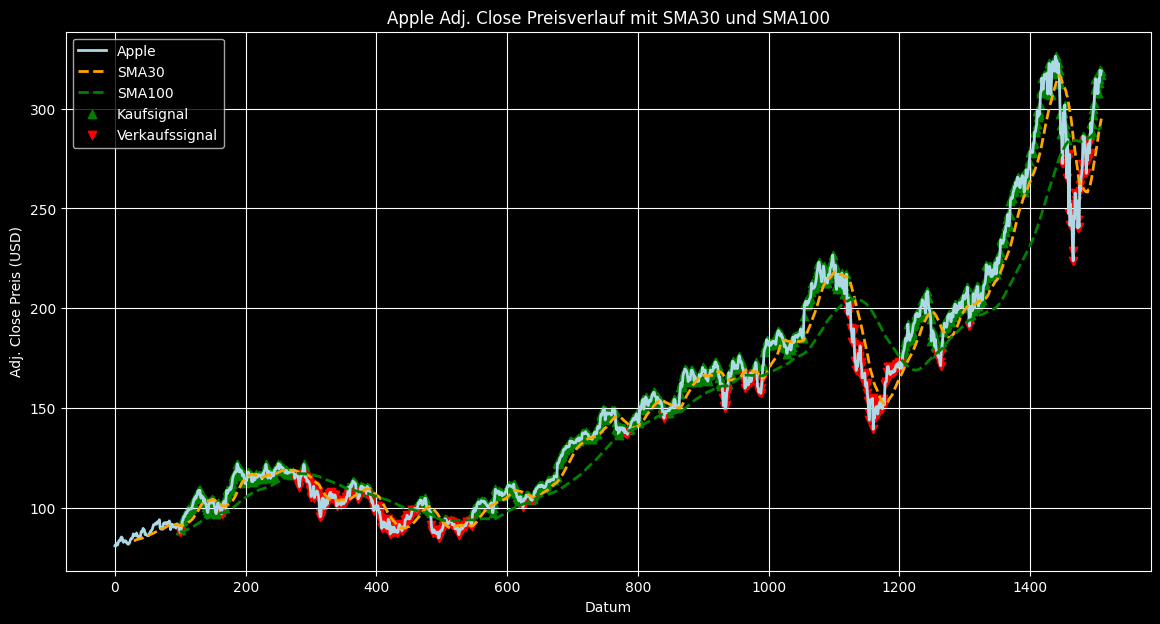

In [16]:
# Berechnung des 30-Tage einfachen gleitenden Durchschnitts (SMA30)
sma30 = apple['Adj Close Price'].rolling(window=30).mean()

# Berechnung des 100-Tage einfachen gleitenden Durchschnitts (SMA100)
sma100 = apple['Adj Close Price'].rolling(window=100).mean()

# Plot der Daten: Apple Adj. Close Preis, SMA30 und SMA100
plt.figure(figsize=(14,7))

# Kursverlauf von Apple
plt.plot(apple['Adj Close Price'], label='Apple', color='lightblue', linewidth=2)

# SMA30
plt.plot(sma30, label='SMA30', color='orange', linestyle='--', linewidth=2)

# SMA100
plt.plot(sma100, label='SMA100', color='green', linestyle='--', linewidth=2)

# Markierung für Kauf- und Verkaufssignale basierend auf den Durchschnittswerten
plt.scatter(apple.index[apple['Adj Close Price'] > sma100].tolist(), 
            apple['Adj Close Price'][apple['Adj Close Price'] > sma100], 
            color='green', marker='^', label='Kaufsignal')

plt.scatter(apple.index[apple['Adj Close Price'] < sma100].tolist(), 
            apple['Adj Close Price'][apple['Adj Close Price'] < sma100], 
            color='red', marker='v', label='Verkaufssignal')

plt.title("Apple Adj. Close Preisverlauf mit SMA30 und SMA100")
plt.xlabel('Datum')
plt.ylabel('Adj. Close Preis (USD)')
plt.legend()
plt.grid(True)
plt.show()


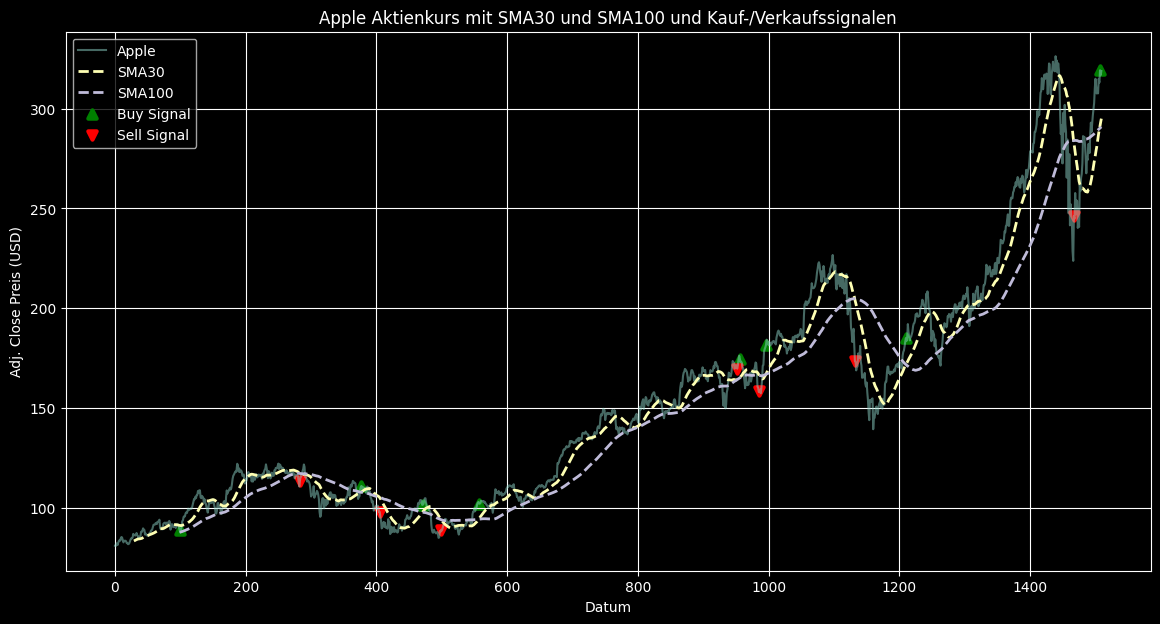

In [15]:
# Zusammenfügen der Daten in einem DataFrame
data = pd.DataFrame()
data['Apple'] = apple['Adj Close Price']
data['SMA30'] = sma30
data['SMA100'] = sma100

# Definition der Funktion für Kauf- und Verkaufssignale
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['Apple'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['Apple'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

# Anwenden der Funktion auf die Daten
buy_sell = buy_sell(data)
data['Buy Signal Price'] = buy_sell[0]
data['Sell Signal Price'] = buy_sell[1]

# Plotten der Daten
plt.figure(figsize=(14,7))

# Kursverlauf von Apple
plt.plot(data['Apple'], label='Apple', alpha=0.5)

# SMA30 und SMA100
plt.plot(data['SMA30'], label='SMA30', linestyle='--', linewidth=2)
plt.plot(data['SMA100'], label='SMA100', linestyle='--', linewidth=2)

# Kauf- und Verkaufssignale
plt.scatter(data.index, data['Buy Signal Price'], label='Buy Signal', marker='^', color='green', lw=3)
plt.scatter(data.index, data['Sell Signal Price'], label='Sell Signal', marker='v', color='red', lw=3)

# Anpassungen des Plots
plt.title('Apple Aktienkurs mit SMA30 und SMA100 und Kauf-/Verkaufssignalen')
plt.xlabel('Datum')
plt.ylabel('Adj. Close Preis (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Zusammenfassung: Algorithmic Trading Projekt mit Python und Machine Learning

### Warum haben wir das gemacht?

Wir haben dieses Projekt durchgeführt, um eine grundlegende Handelsstrategie zu implementieren und zu demonstrieren, wie Python und Machine Learning in der Finanzanalyse und im algorithmischen Handel eingesetzt werden können. Der Hauptzweck dieses Projekts war:

1. **Demonstration von Handelsstrategien**: Wir wollten zeigen, wie einfache Handelsstrategien auf historischen Preisdaten angewendet werden können, um Kauf- und Verkaufssignale zu generieren.

2. **Verwendung von gleitenden Durchschnitten**: Gleitende Durchschnitte sind eine der einfachsten und am häufigsten verwendeten Indikatoren in der technischen Analyse. Wir haben sie gewählt, um einen grundlegenden Einstiegspunkt in die Analyse von Handelsstrategien zu bieten.

3. **Einführung in den algorithmischen Handel**: Algorithmischer Handel ist ein Bereich, der sich stark auf Datenanalyse, statistische Modelle und Programmierung stützt. Dieses Projekt bietet einen Einblick in die Grundlagen des algorithmischen Handels und wie er mit Python durchgeführt werden kann.

### Wo können wir das verwenden?

1. **Bildungszwecke**: Dieses Projekt eignet sich hervorragend für Lernende, die Interesse an der Finanzanalyse und dem algorithmischen Handel haben. Es bietet einen praktischen Ansatz, um Konzepte wie gleitende Durchschnitte und Handelssignale zu verstehen.

2. **Entwicklung von Handelsstrategien**: Die in diesem Projekt demonstrierte Handelsstrategie kann als Grundlage für die Entwicklung komplexerer Handelsstrategien dienen. Es bietet einen Ausgangspunkt für die Implementierung und Optimierung eigener Handelsalgorithmen.

3. **Forschung und Experimente**: Finanzanalysten und Forscher können dieses Projekt als Ausgangspunkt für weitere Experimente und Untersuchungen im Bereich der algorithmischen Finanzanalyse verwenden.

Insgesamt bietet dieses Projekt eine praktische Einführung in die Anwendung von Python und Machine Learning im algorithmischen Handel und kann als Grundlage für weiteres Lernen und Forschen dienen.
